<a href="https://colab.research.google.com/github/davidelgas/DataSciencePortfolio/blob/main/NLP_with_RAG/notebooks/NLP_with_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project Scope and Limitations


Use Case Detailing: Elaborate on how the virtual mechanic will interact with users. Describe example queries and responses to illustrate practical usage.
Impact on Stakeholders: Discuss the expected impact this project could have on various stakeholders, including car owners and BMW clubs.


## 1.1 Project Overview
This project aims to build a generative language model capable of processing written, unstructured questions in English from users and providing targeted written answers. The  use case for this project is a virtual mechanic to help owners maintain a specific make and model of classic car: the BMW 3.0 CS. The results of this effort will be provided to several international BMW clubs to solicity feedback on usability and potential extension to other makes and models.



In [ ]:
# Access to Google Drive
# This seems to propagate credentials better from its own cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


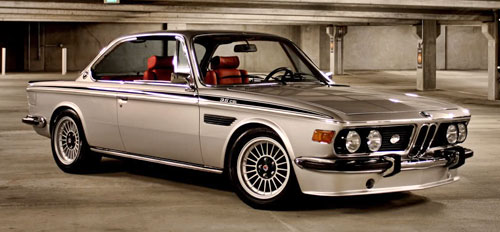

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/NLP/BMW_E9.jpg')

1972 - 1974 BMW 3.0 CS

## 1.2 Objectives
The primary objective of this project is the development of a Natural Language Processing (NLP) model as part of a portfolio of AI projects that can be showcased to potential employers. This will include an outline of the necessary workflow with a comparision and selection of architectures, libraries and methods. This is a complement to my pursuit of a Masters Degree in Data Science.

Measurable Outcomes: Define specific, measurable outcomes to gauge success, such as accuracy metrics or user satisfaction rates.
Workflow Diagram: Include a flowchart or diagram that outlines the entire project workflow for visual representation.

## 1.3 Limitations and Challenges
Python will be the primary programming language. Google Colab will be used for the notebook with compute resources limited to CPUs. Data storage will be done in a Snowflake database. Where possible, a combination of open source and free resource will be used.

Resource Constraints: Discuss the impact of CPU-only resources on model training and inference times.
Data Privacy: Address how data privacy will be ensured when handling user-generated data, particularly concerning personally identifiable information (PII).

## 1.4 Use Case
With this code, a user will be able to ask questions in plain, unstructured English and receive answers that are a result of previous similar questions from the forum used to create the corpus. The answers will also include results from pre-trained models, ensuring a rich and informed response. Users will see these answers in plain English. As a programmer, you have control over the extent to which the answers are sourced from the supplemental corpus versus the pre-trained model. However, users will not see the verbatim source text used to generate the answer.



## 1.5 Workflow for Building a Retrieval-Augmented Generation (RAG) Model

1. **Select a Model**
   - Choose a suitable pre-trained model for your task, such as DistilBERT for embeddings and T5 or GPT for generation.

2. **Compile Corpus**
   - Gather and organize your text data from sources such as a classic car forum.

3. **Create and Store into a Database**
   - Store your structured data into a database for easy access and management.

4. **Remove Unnecessary Characters**
   - Clean the text by removing HTML tags, extra whitespace, non-printable characters, and other irrelevant elements.

5. **Convert Text to Lowercase**
   - Standardize the text by converting all characters to lowercase to ensure uniformity.

6. **Remove Stop Words**
   - Filter out common stop words to focus on more meaningful content.

7. **Deduplication**
   - Remove duplicate entries to ensure the uniqueness of the data.

8. **Lemmatization**
   - Convert words to their base or dictionary form to consolidate similar forms of a word.

9. **Entity Recognition and Anonymization**
   - Identify and anonymize personal information or specific entity names to maintain privacy.

10. **Filter Irrelevant Sections**
    - Remove sections of the text that do not contribute to the knowledge base or are off-topic.

11. **Consolidate Threads**
    - Combine related threads or posts to create a comprehensive view of discussions on similar topics.

12. **Semantic Clustering**
    - Group text segments by their semantic similarities to enhance the structure of the dataset.

13. **Summarize Corpus Content**
    - Condense your text data to highlight the most important information and insights from your corpus.

14. **Format into Questions and Answers**
    - Structure your text into a question-answer format suitable for training your RAG model.
    - Ensure the question string ends with a question mark for clarity.

15. **Tokenization**
    - Break down the text into smaller units called tokens. Use a tokenizer compatible with your chosen model, such as the BERT tokenizer.

16. **Embedding**
    - Convert tokens into numerical representations using embeddings. Use pre-trained embeddings from transformer models like BERT, DistilBERT, or T5.

17. **Build FAISS Index**
    - Create an index of the embeddings using FAISS for fast similarity searches.

18. **Query Processing and Search**
    - Generate embeddings for new queries and use the FAISS index to find the most similar questions in the corpus.

19. **Retrieve and Rank**
    - Fetch the top-N most similar questions and their corresponding answers from the corpus.
    - Concatenate the retrieved contexts to form a comprehensive input for the generative model.

20. **Answer Generation**
    - Employ a generative model like T5 or GPT to generate an answer based on the concatenated context and the query.

21. **Evaluation and Tuning**
    - Assess the model's performance using metrics like precision, recall, F1-score, and accuracy.
    - Fine-tune the pre-trained models on your specific dataset if necessary.

22. **Deploying the Demo**
    - (Optional) Create an interactive UI using tools like Flask or Streamlit.
    - Deploy the model to a server or cloud service for remote access.



In [ ]:
# Install libraries

from IPython.display import Image

# Data Collection
import os

!pip3 install pandas
import pandas as pd

!pip3 install requests
import requests

!pip3 install beautifulsoup4
from bs4 import BeautifulSoup

!pip install snowflake-connector-python
import snowflake.connector

# Data Preprocessing
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from gensim.parsing.preprocessing import STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer as lemmatizer

import re

!pip install langdetect
from langdetect import detect

from transformers import BertTokenizer, BertModel, pipeline

import torch

!pip3 install numpy
import numpy as np

!pip install faiss-cpu
import faiss

!pip install langdetect
from langdetect import detect

!pip install pyLDAvis
import pyLDAvis

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Natural Language Processing Architectures and Models

## 2.1 Traditional Machine Learning Architectures

### 2.1.1 Bag-of-Words (BoW)
- **Description:** Represents text data as a collection of unique words and their frequencies.
- **Example:** Term Frequency-Inverse Document Frequency (TF-IDF)
- **Pros:**
  - Simple and efficient representation.
  - Works well for tasks like sentiment analysis and document classification.
- **Cons:**
  - Ignores word order and context.
  - Doesn't capture semantic meanings well.

### 2.1.2 Word Embeddings
- **Description:** Represent words as dense vectors in a continuous vector space.
- **Examples:** Word2Vec, GloVe
- **Pros:**
  - Captures semantic meanings and relationships between words.
  - Provides dense vector representations suitable for downstream tasks.
- **Cons:**
  - Requires large amounts of data for training.
  - Struggles with out-of-vocabulary words.

### 2.1.3 Sequence Models
- **Description:** Models that capture the sequential nature of text data.
- **Examples:** Hidden Markov Models (HMM), Conditional Random Fields (CRF)
- **Pros:**
  - Captures sequential dependencies in data.
  - Suitable for tasks like named entity recognition and part-of-speech tagging.
- **Cons:**
  - Requires labeled sequential data for training.
  - Can be computationally intensive.

## 2.2 Deep Learning Architectures

### 2.2.1 Convolutional Neural Networks (CNN)
- **Description:** Deep learning models that use convolutional layers for feature extraction.
- **Examples:** TextCNN
- **Pros:**
  - Effective for capturing local dependencies in text data.
  - Can capture hierarchical patterns in data.
- **Cons:**
  - Requires large amounts of training data.
  - Limited ability to capture long-range dependencies.

### 2.2.2 Recurrent Neural Networks (RNN)
- **Description:** Neural networks that process sequences by iterating through elements.
- **Examples:** Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU)
- **Pros:**
  - Effective for capturing sequential dependencies in data.
  - Suitable for tasks like language modeling and machine translation.
- **Cons:**
  - Vulnerable to vanishing and exploding gradient problems.
  - Computationally expensive to train.

### 2.2.3 Transformers
- **Description:** Neural network architecture based entirely on self-attention mechanisms.
- **Examples:** BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pre-trained Transformer), T5 (Text-To-Text Transfer Transformer)
- **Pros:**
  - Captures long-range dependencies effectively.
  - Parallelizable training process.
- **Cons:**
  - Requires large amounts of computational resources.
  - Limited interpretability compared to traditional models.

## 2.3 Retrieval-Augmented Generation (RAG)

### 2.3.1 Knowledge-Enhanced Retrieval-Augmented Generation (KERAG)
- **Description:** A variant of RAG that incorporates knowledge graphs to enhance retrieval and generation.
- **Examples:** Graph-BERT
- **Pros:**
  - Integrates structured knowledge for improved understanding and generation.
  - Enables more coherent and contextually relevant responses.
- **Cons:**
  - Requires high-quality and curated knowledge graphs.
  - Increased computational complexity compared to standard RAG.

## 2.4 Other Architectures and Models

### 2.4.1 Pre-trained Models
- **Description:** Models pre-trained on large corpora and fine-tuned for specific tasks.
- **Examples:** BERT, GPT, T5
- **Pros:**
  - Leverage large amounts of unlabeled data for pre-training.
  - Achieve state-of-the-art performance on various NLP tasks.
- **Cons:**
  - Resource-intensive pre-training process.
  - May require substantial computational resources for fine-tuning.

### 2.4.2 Retriever-Generator Models
- **Description:** Models that combine retrieval and generation components for text generation tasks.
- **Examples:** RAG, KERAG
- **Pros:**
  - Incorporates both structured and unstructured information for generation.
  - Produces more diverse and contextually relevant responses.
- **Cons:**
  - Requires efficient retrieval mechanisms.
  - Increased complexity in model architecture.

### 2.4.3 Knowledge Graphs
- **Description:** Graph-based structures that represent knowledge and relationships between entities.
- **Examples:** ConceptNet, WordNet
- **Pros:**
  - Organizes knowledge in a structured format.
  - Enables reasoning and inference for downstream tasks.
- **Cons:**
  - Requires manual curation and maintenance.
  - Limited coverage and scalability.

### 2.4.4 Dense Passage Retrieval (DPR)
- **Description:** Technique for retrieving relevant passages from a large corpus for question answering.
- **Examples:** DenseRetrieval, TANDA
- **Pros:**
  - Efficient retrieval of contextually relevant information.
  - Suitable for large-scale question answering systems.
- **Cons:**
  - Computationally intensive for indexing large corpora.
  - May suffer from noise in retrieved passages.

### 2.4.5 Elastic Search
- **Description:** Distributed search and analytics engine for indexing and searching large volumes of data.
- **Examples:** Elasticsearch, Apache Solr
- **Pros:**
  - Scalable and distributed architecture.
  - Supports full-text search and complex query structures.
- **Cons:**
  - Requires infrastructure for deployment and maintenance.
  - Indexing and search performance may degrade with large datasets.

### 2.4.6 Anserini
- **Description:** Information retrieval toolkit built on Apache Lucene for research purposes.
- **Examples:** Pyserini, Anserini
- **Pros:**
  - Provides efficient indexing and retrieval capabilities.
  - Supports integration with various retrieval models.
- **Cons:**
  - Requires expertise in information retrieval concepts.
  - Limited documentation and community support.

### 2.4.7 BART (Bidirectional and Auto-Regressive Transformers)
- **Description:** Transformer-based model architecture capable of bidirectional and auto-regressive generation.
- **Examples:** Facebook BART
- **Pros:**
  - Supports both conditional and unconditional text generation.
  - Achieves state-of-the-art performance on various NLP tasks.
- **Cons:**
  - Requires large amounts of computational resources for training.
  - Limited interpretability of generated outputs.

## 2.5 Machine Learning Frameworks and Tools

### 2.5.1 TensorFlow
- **Description:** Open-source machine learning framework developed by Google for building and deploying ML models.
- **Pros:**
  - Comprehensive ecosystem with support for various deep learning architectures.
  - Scalable and efficient execution on both CPUs and GPUs.
- **Cons:**
  - Steeper learning curve compared to some other frameworks.
  - Limited support for dynamic computation graphs.

### 2.5.2 PyTorch
- **Description:** Open-source deep learning framework developed by Facebook's AI Research lab.
- **Pros:**
  - Pythonic and intuitive interface for model development.
  - Dynamic computation graph enables easier debugging and experimentation.
- **Cons:**
  - Less optimized for deployment in production compared to TensorFlow.
  - Limited built-in support for distributed training.

### 2.5.3 scikit-learn
- **Description:** Simple and efficient machine learning library built on NumPy, SciPy, and matplotlib.
- **Pros:**
  - Easy-to-use API for common machine learning tasks.
  - Comprehensive documentation and community support.
- **Cons:**
  - Limited support for deep learning models and architectures.
  - Less flexibility for customization compared to deep learning frameworks.

## 2.6 Topic Modeling and Dimensionality Reduction

### 2.6.1 Latent Dirichlet Allocation (LDA)
- **Description:** Probabilistic generative model for topic modeling in text corpora.
- **Pros:**
  - Provides interpretable topics from document collections.
  - Flexible and scalable for large datasets.
- **Cons:**
  - Assumes documents are mixtures of topics, which may not always hold true.
  - Requires manual tuning of hyperparameters for optimal performance.

### 2.6.2 Principal Component Analysis (PCA)
- **Description:** Technique for dimensionality reduction by projecting data onto a lower-dimensional subspace.
- **Pros:**
  - Reduces dimensionality while preserving most of the variance in the data.
  - Computationally efficient and widely applicable.
- **Cons:**
  - Linear transformation may not capture complex nonlinear relationships.
  - Assumes linear relationships between variables.

### 2.6.3 t-Distributed Stochastic Neighbor Embedding (t-SNE)
- **Description:** Nonlinear dimensionality reduction technique for visualizing high-dimensional data in low-dimensional space.
- **Pros:**
  - Preserves local structure and clusters in the data.
  - Effective for visualizing complex datasets in two or three dimensions.
- **Cons:**
  - Computationally expensive for large datasets.
  - Interpretation of results can be subjective and dependent on hyperparameters.

## Conclusion

This document provides an overview of various architectures, models, and tools used in natural language processing tasks. Understanding the strengths and weaknesses of different approaches is crucial for designing effective NLP systems tailored to specific use cases and requirements.


# 3. Data Collection and Preprocessing





## 3.1 Data Ethics


The data collected here is a collection of posts from widely avaialble public sources. However, should this project move into a public forum additional steps will be necessary to endure PII is obfuscated or removed. In addition, this document shall serve as full disclosure of the projects goals and data gathering process.

## 3.2 Data Collection




The project leverages user-generated content from a domain-specific online forum as the training corpus. This data is largely unstructured, with minimal metadata available. The following tools were considered to gather the source text for the corpus:


### Web Scraping
- **Tools:** Beautiful Soup, online SaaS products
    - **Pros:**
        - **Direct Access to Targeted Data:** Enables precise extraction of user-generated content from specific sections or threads within the forum.
        - **Efficiency in Data Collection:** Automated scripts can gather large volumes of data in a short amount of time, making it suitable for assembling significant datasets for NLP.
    - **Cons:**
        - **Potential for Incomplete Data:** May miss embedded content or dynamically loaded data, depending on the website’s structure.
        - **Ethical and Legal Considerations:** Scraping data from forums may raise concerns about user privacy and must adhere to the terms of service of the website.
        - **Very Platform Dependent:** Forum specific solutions result in forum specific data schemas that must be reverse engineered to for successful text extraction.

### Forum-specific APIs
- **Tools:** Python (`requests` library for API calls and `json` library for handling responses)
    - **Pros:**
        - **Structured and Reliable Data Retrieval:** APIs provide structured data, making it easier to process and integrate into your project.
        - **Efficient and Direct Access:** Directly accessing the forum's data through its API is efficient, bypassing the need for HTML parsing.
        - **Compliance and Ethical Data Use:** Utilizing APIs respects the forum's data use policies and ensures access is in line with user agreements.
    - **Cons:**
        - **Rate Limiting:** APIs often have limitations on the number of requests that can be made in a certain timeframe, which could slow down data collection.
        - **API Changes:** Dependence on the forum's API structure means that changes or deprecation could disrupt your data collection pipeline.
        - **Access Restrictions:** Some data or functionalities might be restricted or require authentication, posing additional challenges for comprehensive data collection.


**Conclusion: I will be using Beautiful Soup to create my corpus.**


In [53]:
# Create Corpus

# Set the base path to save files
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

# Create URLs from the thread_ids and save to a CSV
def create_urls():
    # Define the file path inside the function using the correct base path
    file_path = BASE_PATH + 'e9_forum_thread_ids.csv'

    # Set the number of incremental thread_ids to process
    threads = 100

    # Check if the file exists and has content. If it does, update last_thread_id
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        e9_forum_thread_ids = pd.read_csv(file_path)
        last_thread_id = e9_forum_thread_ids['thread_id'].iloc[-1]
        last_thread_id = int(last_thread_id)  # Convert to integer
    else:
        last_thread_id = 0

    urls = []
    for thread_id in range(last_thread_id + 1, last_thread_id + threads + 1):
        urls.append({'thread_id': thread_id})

    last_thread_id_processed = urls[-1]['thread_id']

    # Convert the list of dictionaries into a DataFrame
    e9_forum_thread_ids = pd.DataFrame(urls)

    # Save DataFrame to CSV file
    e9_forum_thread_ids.to_csv(file_path, mode='a', header=not os.path.exists(file_path), index=False)

    print("Starting with thread_id " + str(last_thread_id))
    print("Processing additional " + str(threads) + " threads")
    print("Ending with thread_id " + str(last_thread_id_processed))


    return last_thread_id, last_thread_id_processed, e9_forum_thread_ids

# Ingest thread_ids and return title, id and URL
def fetch_thread_data(df):
    # Define the file path inside the function using the correct base path
    file_path = BASE_PATH + 'e9_forum_threads.csv'

    # Set the number of pages to process
    pages = 1

    for index, row in df.iterrows():
        thread_id = row['thread_id']
        thread_url = f"https://e9coupe.com/forum/threads/{thread_id}"
        for i in range(1, pages + 1):
            page_url = f"{thread_url}/?page={i}"  # Construct the page URL
            response = requests.get(page_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            title = soup.find('title').get_text()
            thread_title = title.split('|')[0].strip()
            df.at[index, 'thread_title'] = thread_title
            df.at[index, 'thread_url'] = page_url

    df.to_csv(file_path, mode='a', header=not os.path.exists(file_path), index=False)

    return df

# Find the first post in the thread creation
def fetch_first_post_content(df):
    # Define the file path inside the function using the correct base path
    file_path = BASE_PATH + 'e9_forum_threads_decorated.csv'

    data = []

    for thread_id, thread_url, thread_title in zip(df['thread_id'], df['thread_url'], df['thread_title']):
        response = requests.get(thread_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        first_post = soup.find('article', class_='message-body')
        if first_post:
            post_content = first_post.get_text(strip=True)
        else:
            post_content = "No content found"  # Handle case where no post content is found

        data.append({'thread_id': thread_id, 'thread_title': thread_title, 'thread_first_post': post_content})

    # Convert list of dictionaries to DataFrame
    e9_forum_threads_decorated = pd.DataFrame(data)

    # Export and save result
    e9_forum_threads_decorated.to_csv(file_path, mode='a', header=not os.path.exists(file_path), index=False)

    return e9_forum_threads_decorated


# Original UDF to fetch and parse thread posts
def fetch_and_parse_thread(df):
    post_data = []
    processed_posts = set()
    for index, row in df.iterrows():
        response = requests.get(row['thread_url'])
        soup = BeautifulSoup(response.text, 'html.parser')
        articles = soup.find_all('article', class_='message--post')
        for article in articles:
            post_timestamp = article.find('time')['datetime'] if article.find('time') else 'N/A'
            content = article.find('div', class_='bbWrapper').get_text(strip=True)

            post_data.append({
                'thread_id': row['thread_id'],
                'post_timestamp': post_timestamp,
                'post_raw': content
            })

    e9_forum_posts = pd.DataFrame(post_data)

    e9_forum_posts['post_raw'] = e9_forum_posts['post_raw'].astype(str)

    # Define the output path
    output_path = os.path.join(BASE_PATH, 'e9_forum_posts.csv')

    # Export and save result
    e9_forum_posts.to_csv(output_path, index=False)

    return e9_forum_posts


# Define the UDF to process the data
def create_forum_corpus(e9_forum_posts, e9_forum_threads_decorated):

    # Group by THREAD_ID and concatenate the POST_RAW values
    aggregated_data = e9_forum_posts.groupby('thread_id')['post_raw'].agg(lambda x: ' '.join(x)).reset_index()

    # Rename the column to indicate that it contains concatenated post content
    aggregated_data.rename(columns={'post_raw': 'thread_all_posts'}, inplace=True)

    # Ensure thread_id columns are of type int64
    e9_forum_threads_decorated['thread_id'] = e9_forum_threads_decorated['thread_id'].astype('int64')
    aggregated_data['thread_id'] = aggregated_data['thread_id'].astype('int64')

    # Merge the two DataFrames
    e9_forum_corpus = pd.merge(e9_forum_threads_decorated, aggregated_data, on='thread_id', how='left')

    # Define the output path
    output_path = os.path.join(BASE_PATH, 'e9_forum_corpus.csv')

    # Export and save result
    e9_forum_corpus.to_csv(output_path, index=False)

    return e9_forum_corpus

def main():
    # Execute the function and print results
    last_thread_id, last_thread_id_processed, e9_forum_thread_ids = create_urls()

    # Fetch thread URLs and title
    e9_forum_threads = fetch_thread_data(e9_forum_thread_ids)

    # Fetch first post content
    e9_forum_threads_decorated = fetch_first_post_content(e9_forum_threads)

    # Fetch all thread post content
    e9_forum_posts = fetch_and_parse_thread(e9_forum_threads)

    e9_forum_corpus = create_forum_corpus(e9_forum_posts, e9_forum_threads_decorated)


# Ensure the main function is called
if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting with thread_id 300
Processing additional 100 threads
Ending with thread_id 400


## 3.3 Data Storage and Database



Efficient data storage and management are pivotal for the project, focusing on accommodating extensive unstructured data from various sources. The project explores two main classes of storage solutions: Cloud Storage and Local Storage, each offering unique benefits and challenges.

### Cloud Storage
Cloud storage solutions offer scalability, reliability, and remote access, making them suitable for projects with dynamic data needs and global access requirements.

- **Tools:** Snowflake (for relational data), MongoDB Atlas (for NoSQL data)
    - **Pros:**
        - **Scalability:** Easily scales to meet growing data demands without the need for physical infrastructure management.
        - **Accessibility:** Provides global access to the data, facilitating collaboration and remote work.
        - **Maintenance and Security:** Cloud providers manage the security, backups, and maintenance, reducing the administrative burden.
    - **Cons:**
        - **Cost:** While scalable, costs can increase significantly with data volume and throughput.
        - **Internet Dependence:** Requires consistent internet access, which might be a limitation in some scenarios.
        - **Data Sovereignty:** Data stored in the cloud may be subject to the laws and regulations of the host country, raising concerns about compliance and privacy.

### Local Storage
Local storage solutions rely on on-premises or personal hardware, providing full control over the data and its management but requiring more direct oversight.

- **Tools:** MySQL (for relational data), MongoDB (Local installation for NoSQL data)
    - **Pros:**
        - **Control:** Complete control over the data storage environment and configurations.
        - **Cost:** No ongoing costs related to data storage size or access rates, aside from initial hardware and setup.
        - **Connectivity:** No reliance on internet connectivity for access, ensuring data availability even in offline scenarios.
    - **Cons:**
        - **Scalability:** Physical limits to scalability; expanding storage capacity requires additional hardware.
        - **Maintenance:** Requires dedicated resources for maintenance, backups, and security, increasing the administrative burden.
        - **Accessibility:** Data is not as easily accessible from remote locations, potentially hindering collaboration and remote access needs.


**Conclusion: I will be using Snowflake to store my corpus.**

In [54]:
# Store Corpus

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'
CREDENTIALS_PATH = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'

# Load the e9_forum_corpus DataFrame from the CSV file
e9_forum_corpus = pd.read_csv(BASE_PATH + 'e9_forum_corpus.csv')

def load_credentials(credentials_path):
    """Load Snowflake credentials from a file and set them as environment variables."""
    with open(credentials_path, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def connect_to_snowflake():
    """Establish a connection to the Snowflake database."""
    return snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT')
    )

def create_db_and_schema(cur):
    """Create the database and schema in Snowflake."""
    try:
        cur.execute("CREATE DATABASE IF NOT EXISTS e9_corpus")
        cur.execute("USE DATABASE e9_corpus")
        cur.execute("CREATE SCHEMA IF NOT EXISTS e9_corpus_schema")
        print("Database and schema created successfully.")
    except Exception as e:
        print(f"Error creating database and schema: {e}")

def create_table_if_not_exists(cur):
    """Create the e9_forum_corpus table if it does not exist."""
    try:
        cur.execute("""
        CREATE TABLE IF NOT EXISTS e9_corpus.e9_corpus_schema.e9_forum_corpus (
            thread_id NUMBER(38,0),
            thread_title VARCHAR(16777216),
            thread_first_post VARCHAR(16777216),
            thread_all_posts VARCHAR(16777216)
        )
        """)
        print("e9_forum_corpus table created successfully.")
    except Exception as e:
        print(f"Error creating table: {e}")

def insert_data_into_table(cur, df):
    """Insert data from the DataFrame into the e9_forum_corpus table."""
    for index, row in df.iterrows():
        row = row.where(pd.notnull(row), None)
        insert_command = f"""
        INSERT INTO e9_corpus.e9_corpus_schema.e9_forum_corpus
        (thread_id, thread_title, thread_first_post, thread_all_posts)
        VALUES (%s, %s, %s, %s)
        """
        try:
            cur.execute(insert_command, (
                row['thread_id'], row['thread_title'],
                row['thread_first_post'], row['thread_all_posts']
            ))
        except Exception as e:
            print(f"Error inserting data: {e}")

def fetch_data_from_table(cur):
    """Fetch all data from the e9_forum_corpus table."""
    query = "SELECT * FROM e9_corpus.e9_corpus_schema.e9_forum_corpus"
    cur.execute(query)
    return cur.fetch_pandas_all()

def main():
    # Load Snowflake credentials
    load_credentials(CREDENTIALS_PATH)

    # Connect to Snowflake
    conn = connect_to_snowflake()
    cur = conn.cursor()

    # Create the database, schema, and table if they don't exist
    create_db_and_schema(cur)
    create_table_if_not_exists(cur)

    # Insert data into the table
    insert_data_into_table(cur, e9_forum_corpus)
    conn.commit()
    print("Data inserted into e9_forum_corpus table.")

    # Fetch data from the table
    e9_forum_corpus_df = fetch_data_from_table(cur)
    e9_forum_corpus_df.info()

    # Close cursor and connection
    cur.close()
    conn.close()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Database and schema created successfully.
e9_forum_corpus table created successfully.
Data inserted into e9_forum_corpus table.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   THREAD_ID          400 non-null    int16 
 1   THREAD_TITLE       400 non-null    object
 2   THREAD_FIRST_POST  400 non-null    object
 3   THREAD_ALL_POSTS   400 non-null    object
dtypes: int16(1), object(3)
memory usage: 10.3+ KB


In [55]:
# Clean corpus

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import os
import snowflake.connector

def connect_to_snowflake():
    """Establish connection to the Snowflake database."""
    conn = snowflake.connector.connect(
        user=os.environ['USER'],
        password=os.environ['PASSWORD'],
        account=os.environ['ACCOUNT'],
    )
    return conn

def fetch_data(conn):
    """Fetch data from the Snowflake database."""
    cur = conn.cursor()
    query = """
    SELECT * FROM "E9_CORPUS"."E9_CORPUS_SCHEMA"."E9_FORUM_CORPUS";
    """
    cur.execute(query)
    df = cur.fetch_pandas_all()
    cur.close()
    return df

def alpha_numeric(df):
    """Removes non-alphanumeric characters and unwanted patterns from text."""
    pattern_email = re.compile(r'\S*@\S*\s?')
    pattern_url = re.compile(r'https?://\S+|www\.\S+')
    pattern_non_alpha = re.compile(r'[^a-zA-Z0-9\s]')
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: pattern_non_alpha.sub('', pattern_url.sub('', pattern_email.sub('', str(text)))))
    return df

def remove_stop_words(df):
    """Removes stop words from the text."""
    stop_words_set = set(stopwords.words('english')).union({'car', 'csi', 'cs', 'csl', 'e9', 'coupe', 'http', 'https', 'www', 'ebay', 'bmw', 'html'})
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words_set]))
    return df

def tokenize_and_lemmatize(df):
    """Tokenizes and lemmatizes the text in specified columns."""
    lemmatizer = WordNetLemmatizer()
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]))
    return df

def clean_nan_values(df):
    """Removes or replaces NaN values in the dataset."""
    # Option to replace NaN values with an empty string or other placeholder
    df.fillna('', inplace=True)
    return df

def main():
    """Main function to run the data processing pipeline."""
    conn = connect_to_snowflake()
    df = fetch_data(conn)
    df = alpha_numeric(df)
    df = remove_stop_words(df)
    df = tokenize_and_lemmatize(df)
    df = clean_nan_values(df)  # Final NaN cleaning step
    df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/cleaned_corpus.csv', index=False)
    conn.close()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4.1 Summarization Strategies



Summarization in NLP involves condensing large texts into shorter versions, capturing the most critical information. This can be approached through extractive or abstractive methods, or a combination of both.

### Extractive Summarization
- **Tools:** OpenNMT, Sumy, Gensim
    - **Pros:**
        - **Good with Raw Text:** Works directly with raw text, selecting key sentences without deep processing.
        - **Straightforward Implementation:** Simplifies implementation without needing complex preprocessing.
    - **Cons:**
        - **Limited Depth in Understanding:** May not fully grasp nuanced meanings in complex texts.
        - **Less Effective with Poorly Structured Text:** Struggles with identifying main points in unstructured or informal text.

### Abstractive Summarization
- **Tools:** sshleifer/distilbart-cnn-12-6, T5, BERTSum
    - **Pros:**
        - **Advanced Processing Capabilities:** Designed to interpret and rephrase raw text, capturing contextual nuances.
        - **Higher Tolerance for Unstructured Text:** Manages and refines unstructured or informal text into coherent summaries.
    - **Cons:**
        - **Dependence on Preprocessing:** The output's quality can be improved with proper preprocessing for complex texts.
        - **Potential Overhead:** More computational resources required for understanding raw text.

### Hybrid Summarization
- **Combines extractive and abstractive methods for a balanced approach to summarization.**
    - **Pros:**
        - **Flexibility in Text Processing:** Handles both raw and preprocessed text, adapting to text complexity.
        - **Balanced Approach:** Leverages strengths of both methods for identifying key points and generating summaries.
    - **Cons:**
        - **Complex Preprocessing Requirements:** Integrating both methods may require sophisticated preprocessing.
        - **Potential for Processing Inefficiencies:** Could lead to redundancies or inefficiencies if not carefully managed.

*Note: After attempting sshleifer/distilbart-cnn-12-6, which has a character limit too restrictive for my needs, T5 was chosen for its lack of character limits and broader applicability to the project's goals.*

In [56]:
# Summarization and clustering

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

def consolidate_threads(df, n_topics=10):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    data_vectorized = vectorizer.fit_transform(df['THREAD_ALL_POSTS'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(data_vectorized)
    df['Topic'] = lda.transform(data_vectorized).argmax(axis=1)
    return df

def semantic_clustering(df, n_clusters=5):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['THREAD_ALL_POSTS'])
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(tfidf_matrix)
    df['Cluster'] = kmeans.labels_
    return df

def summarize_clusters(df):
    summaries = {}
    for cluster in df['Cluster'].unique():
        cluster_text = " ".join(df[df['Cluster'] == cluster]['THREAD_ALL_POSTS'])
        # Placeholder for summarization logic
        summaries[cluster] = cluster_text[:500]  # Simplified example
    return summaries

def main():
    # Load the preprocessed data
    lem_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/cleaned_corpus.csv')

    # Handle NaN values explicitly
    lem_df['THREAD_ALL_POSTS'].fillna('', inplace=True)  # Replace NaN with empty strings

    # Apply the processing functions
    lem_df = consolidate_threads(lem_df)
    lem_df = semantic_clustering(lem_df)
    cluster_summaries = summarize_clusters(lem_df)

    # Optionally, save or display the results
    print(cluster_summaries)

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: 'New owner Goin NC drive home NJ cant wait post experience read laugh cry critiqueI look forward coming lurker statusRegards Congrats NJ New OwnerCongrats pecsokfrom one new owner another javascriptemoticonBack left coast last week wrap thing Coupeking due arrive 2nd week MayWill look forward meeting ristate coupstersChuckL Hi ChuckHow thing go imagine look great Agave CoupeHi LenCar way look great cant wait start active ownership CoupeKing experience immersive Take look latest Bimmer Magazine ge', 1: 'looksfamiliarI suspected might board went MIA day mye28com DNS problem time 8So DanG carving board forum Consider vote General conversation Tech talk Tech FAQ would usefulBroken External Image ForumsWe break anyway want limited amount traffic get coupe dont need break muchGeneral DiscussionOffTopicTechnical ArticlesSite suggestion questionsClassifiedsNot sure need Tech Talk area since General Discussion area probably wont get busy always add laterDan good back chatting amongst owner 

In [57]:
# Visualization

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/cleaned_corpus.csv')
df['THREAD_ALL_POSTS'].fillna('', inplace=True)

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['THREAD_ALL_POSTS'])  # Document-term matrix

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(dtm)

# Prepare the visualization data for pyLDAvis
pyLDAvis.enable_notebook()
prepared_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis],  # Normalized topic-term distributions
    doc_topic_dists=lda.transform(dtm),  # Document-topic distributions
    doc_lengths=list(dtm.sum(axis=1).A1),  # Length of each document
    vocab=vectorizer.get_feature_names_out(),  # List of all terms in the vocabulary
    term_frequency=np.asarray(dtm.sum(axis=0)).ravel().tolist(),  # Frequency of each term in the corpus
    mds='tsne'  # Using t-SNE for multi-dimensional scaling
)

# Display the visualization
pyLDAvis.display(prepared_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


## Coverting Corpus into Questions and Answers

In [58]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/cleaned_corpus.csv')

df.info()

# Fill missing values with an empty string to ensure concatenation works without errors
df['THREAD_FIRST_POST'].fillna('', inplace=True)
df['THREAD_ALL_POSTS'].fillna('', inplace=True)


# Change THREAD_FIRST_POST to 'QUESTION'
df.rename(columns={'THREAD_FIRST_POST': 'QUESTION'}, inplace=True)

# Change THREAD_ALL_POSTS to 'ANSWER'
df.rename(columns={'THREAD_ALL_POSTS': 'ANSWER'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   THREAD_ID          400 non-null    int64 
 1   THREAD_TITLE       398 non-null    object
 2   THREAD_FIRST_POST  399 non-null    object
 3   THREAD_ALL_POSTS   399 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4.2 Tokenization Strategies

Tokenization is a crucial preprocessing step in NLP, segmenting text into manageable units for further analysis or model training. The choice of tokenization strategy affects both the complexity of the model and its ability to understand the text.

### Word-level Tokenization
- **Tools:** NLTK, spaCy, TensorFlow/Keras Tokenizers, BPE, Hugging Face Tokenizers
    - **Pros:**
        - Preserves word integrity and semantic meaning, crucial for comprehension tasks.
        - Subword tokenization methods like BPE can efficiently handle unknown words.
    - **Cons:**
        - Can result in a large vocabulary size, increasing memory and processing requirements.
        - May overlook nuances in character-level variations.

### Character-level Tokenization
- **Tools:** Supported by deep learning frameworks like TensorFlow and Keras
    - **Pros:**
        - Captures morphological nuances at the character level, aiding languages with rich morphology.
        - Simplifies the vocabulary to a set of unique characters, reducing model complexity.
    - **Cons:**
        - Leads to longer input sequences, which can increase computational costs.
        - Loses direct access to semantic information encoded in words or phrases.

### Subword Tokenization (BPE and Hugging Face Tokenizers)
- **Tools** A blend of word-level and character-level tokenization, aiming to balance vocabulary size and semantic richness.
    - **Pros:**
        - Offers a middle ground, effectively managing vocabulary size while preserving semantic information.
        - Facilitates handling of rare or unknown words by breaking them down into recognizable subwords.
    - **Cons:**
        - Requires preprocessing to establish a subword vocabulary, adding complexity.
        - Generated subwords may lack standalone meaning, complicating interpretation.



### Model-Specific Tokenization
- **Tools:** Hugging Face's transformers library provides access to pre-built tokenizers corresponding to each pre-trained model, ensuring that tokenization is consistent with the model's original training data.

Examples:

- **For BERT:** AutoTokenizer.from_pretrained('bert-base-uncased')

- **For GPT-2:** AutoTokenizer.from_pretrained('gpt2')

- **For T5:** AutoTokenizer.from_pretrained('t5-small')


**Conclusion: I will be using Hugging Face for tokenization, sequencing and padding**

### 2.4.3 Embedding Strategies

# BERT (Bidirectional Encoder Representations from Transformers)
## Characteristics:
- **Bidirectional Context**: BERT is designed to pre-train deep bidirectional representations by conditioning on both left and right context in all layers. This results in a rich understanding of language context and nuances.
- **Architecture**: Primarily used for classification tasks, answering questions, and filling masked words.

## Pros:
- **Understanding Context**: Excellent at understanding the context of a given word in a sentence or a paragraph, making it well-suited for tasks that require a deep understanding of sentence relationships.
- **Fine-Tuning Flexibility**: BERT can be fine-tuned with just one additional output layer, which makes it versatile for a wide range of tasks beyond just understanding language, including classification, entity recognition, and question answering.

## Cons:
- **Output Limitations**: BERT is not inherently generative; it's more about understanding context and relationships between sentences or parts of text. It doesn’t generate coherent text in the same way GPT models do.

# GPT-2 (Generative Pre-trained Transformer 2)
## Characteristics:
- **Unidirectional Nature**: GPT-2 operates in a left-to-right manner, where every token can only attend to previous tokens in the self-attention layers of the transformer.
- **Generative Capabilities**: Designed to generate text, GPT-2 excels in tasks that require new content creation based on the input given.

## Pros:
- **Text Generation**: GPT-2 is highly effective at generating coherent and contextually relevant text passages, making it ideal for applications that need creative text outputs.
- **Adaptability**: Can be adapted to a wide variety of tasks without needing task-specific data handling.

## Cons:
- **Context Limitation**: As it is unidirectional, it may sometimes miss the context that could have been captured from the right side (future context) in a given text scenario.

# Application to RAG Systems
- **BERT’s Strengths**: If your RAG system relies heavily on understanding the context and nuances of user queries or needs to provide answers where understanding the question's context is crucial, BERT might be more appropriate.
- **GPT-2’s Strengths**: If your RAG system is focused on generating explanatory or expansive text based on the input queries, or if you need to generate text that flows naturally and is engaging, GPT-2 would be better.

## Suggested Approach:
- **Hybrid Model**: Considering that RAG systems often benefit from both the understanding of context and the ability to generate text, a hybrid approach might also be viable. For instance, use BERT for understanding and encoding the query and context retrieval parts of your RAG, and use GPT-2 or another generative model for the response generation part.

## Implementation Consideration:
- Evaluate both models in a small-scale pilot study to see which model aligns best with your specific requirements.
- Consider computational resources and training time, as both models are resource-intensive.

# Simplified Approach for a Retrieval-Augmented Generation (RAG) System
## Model Selection:
- **Choose DistilBERT**: Instead of full BERT or GPT-2, consider using DistilBERT. It’s a lighter version of BERT that retains most of its capabilities but is faster and requires less computational resources. DistilBERT provides a good balance between performance and efficiency, making it ideal for initial prototyping.

## Data Preparation:
- **Minimize Preprocessing Steps**: Focus on essential preprocessing steps such as tokenization and basic cleaning (e.g., removing special characters and converting to lowercase). Skip more complex steps like semantic clustering or detailed entity recognition initially.
- **Use Existing Splits**: If possible, use predefined data splits (train, test, validation) to speed up the process.

## Tokenization and Embedding:
- **Use Hugging Face’s Tokenizers**: Leverage the AutoTokenizer from Hugging Face for DistilBERT. This tool will handle both tokenization and embedding preparation, simplifying the data preparation pipeline.

## Model Training:
- **Simplified Training Loop**: For the initial runs, set up a simple training loop without extensive hyperparameter tuning. Focus on getting the model to run with basic parameters.
- **Monitor Simple Metrics**: Track basic performance metrics like accuracy or loss during the initial runs. This provides quick feedback on how the model is performing.

## Evaluation:
- **Basic Evaluation**: Use straightforward metrics such as accuracy or F1 score for initial evaluation. This helps in understanding the baseline performance without getting into more complex evaluation strategies.

## Iterative Refinement:
- **Feedback Loop**: Once the basic system is up and running, gradually introduce more complexity by adding one component at a time (e.g., more sophisticated preprocessing, advanced metrics, or fine-tuning strategies).


In [62]:
import pandas as pd
from transformers import AutoTokenizer, DistilBertModel
import pickle
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Preparing and saving tokenized data
def prepare_and_save_data(df, question_col, answer_col, model='bert-base-uncased', max_length=512, save_path='tokenized_data.pkl'):
    # Load the tokenizer for the specified model
    tokenizer = AutoTokenizer.from_pretrained(model)

    # Limit the DataFrame to the first 10 rows for troubleshooting
    df = df.head(100)

    # Tokenize the question and answer texts
    tokenized_questions = tokenizer(list(df[question_col].fillna('')), max_length=max_length, truncation=True, padding='max_length', return_tensors='pt')
    tokenized_answers = tokenizer(list(df[answer_col].fillna('')), max_length=max_length, truncation=True, padding='max_length', return_tensors='pt')

    # Save tokenized data to disk
    with open(save_path, 'wb') as f:
        pickle.dump((tokenized_questions, tokenized_answers), f)

    print(f"Tokenized data saved to {save_path}")

# Assuming df is your DataFrame loaded with the data
# Example usage, make sure 'df' is defined and loaded with your full dataset
# prepare_and_save_data(df, 'QUESTION', 'ANSWER')

# Step 2: Loading data and generating embeddings
def load_data_and_generate_embeddings(model_path='distilbert-base-uncased', data_path='tokenized_data.pkl'):
    # Load the model
    model = DistilBertModel.from_pretrained(model_path)

    # Load the tokenized data
    with open(data_path, 'rb') as f:
        tokenized_questions, tokenized_answers = pickle.load(f)

    # Ensure only input_ids and attention_mask are passed to the model
    with torch.no_grad():
        question_embeddings = model(input_ids=tokenized_questions['input_ids'],
                                    attention_mask=tokenized_questions['attention_mask']).last_hidden_state.mean(dim=1)
        answer_embeddings = model(input_ids=tokenized_answers['input_ids'],
                                  attention_mask=tokenized_answers['attention_mask']).last_hidden_state.mean(dim=1)

    return question_embeddings, answer_embeddings

# Load data and generate embeddings
question_embeddings, answer_embeddings = load_data_and_generate_embeddings()

# Step 3: Finding the most similar answer
def find_most_similar(query_embedding, answer_embeddings):
    # Convert PyTorch tensors to numpy arrays for cosine similarity computation
    query_embedding_np = query_embedding.detach().cpu().numpy().reshape(1, -1)
    answer_embeddings_np = answer_embeddings.detach().cpu().numpy()

    # Calculate cosine similarities
    similarities = cosine_similarity(query_embedding_np, answer_embeddings_np)

    # Find the index of the most similar answer
    most_similar_index = np.argmax(similarities)
    return most_similar_index

# Example usage: Assuming you're using the first question's embedding as a query
index_of_most_similar = find_most_similar(question_embeddings[0], answer_embeddings)
print("Index of the most similar answer:", index_of_most_similar)
print("Most similar answer text:", df.iloc[index_of_most_similar]['ANSWER'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index of the most similar answer: 0
Most similar answer text: New owner Goin NC drive home NJ cant wait post experience read laugh cry critiqueI look forward coming lurker statusRegards Congrats NJ New OwnerCongrats pecsokfrom one new owner another javascriptemoticonBack left coast last week wrap thing Coupeking due arrive 2nd week MayWill look forward meeting ristate coupstersChuckL Hi ChuckHow thing go imagine look great Agave CoupeHi LenCar way look great cant wait start active ownership CoupeKing experience immersive Take look latest Bimmer Magazine get senseWill look hook soon touch eastChuck Sounds like plan Chuck know youve waiting day quite must feel great close Looking forward meeting seeing Hi LenIm Belleville work Fair Lawn rt 4208 ChuckCongrats completion must excited arrivalYesterday beautiful dayLooking foward tristate gatheringJohn C Thanks Chuck kudosId love little mini coupefest tristate area Theres great place near I9580 interchange called Overpeck Park large lot park

Evaluate and Optimize the Model:

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 4: Generate Predictions
def generate_predictions(question_embeddings, answer_embeddings):
    predictions = []
    for i in range(len(question_embeddings)):
        index_of_most_similar = find_most_similar(question_embeddings[i], answer_embeddings)
        predictions.append(index_of_most_similar)
    return predictions

# Generate predictions
predictions = generate_predictions(question_embeddings, answer_embeddings)

# Define ground truth
ground_truth = list(range(len(question_embeddings)))

# Step 5: Evaluate the Model
def evaluate_model(predictions, ground_truth):
    # Calculate metrics
    accuracy = accuracy_score(ground_truth, predictions)
    precision = precision_score(ground_truth, predictions, average='macro', zero_division=0)
    recall = recall_score(ground_truth, predictions, average='macro', zero_division=0)
    f1 = f1_score(ground_truth, predictions, average='macro', zero_division=0)

    return accuracy, precision, recall, f1

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(predictions, ground_truth)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.5000
Precision: 0.3333
Recall: 0.5000
F1-Score: 0.3833


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
import sys

# Stop the execution of code
sys.exit("Execution stopped.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SystemExit: Execution stopped.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 4. Training and Evaluation




1. **PyTorch and Hugging Face Transformers**
   - **Pros:** PyTorch offers dynamic computation graphs that are intuitive for RAG model development. Hugging Face's Transformers library provides easy access to pre-trained models and tokenizers, facilitating both training and evaluation with extensive support for RAG architectures.
   - **Cons:** While highly flexible, this combination might require a steep learning curve for those not familiar with PyTorch or the Transformers library.

2. **TensorFlow and T5**
   - **Pros:** TensorFlow provides robust tools for model development and deployment, with T5 being a versatile model for text-to-text tasks, adaptable for RAG purposes. TensorFlow's extensive ecosystem includes TensorBoard for monitoring training processes.
   - **Cons:** TensorFlow's static computation graph can be less intuitive than PyTorch's dynamic graphs. T5's text-to-text format might require additional preprocessing steps.

3. **JAX and Flax/Haiku**
   - **Pros:** JAX offers accelerated NumPy operations and automatic differentiation, making it efficient for large-scale model training. Flax and Haiku provide neural network libraries for JAX, supporting complex RAG model architectures.
   - **Cons:** JAX's ecosystem is less mature, with fewer pre-trained models and community resources available compared to PyTorch and TensorFlow. This can make development and troubleshooting more challenging.


## 4.1 Hyperparameter Tuning

4.1 Hyperparameter Tuning
Tuning Strategy: Outline your strategy for hyperparameter tuning, including the tools or techniques (like grid search or random search) you plan to use.

## 4.2 Model Evaluation

Evaluation Metrics: Detail the metrics you will use to evaluate your model, such as F1 score, precision, recall, and explain why each is important for your project’s success.


The project's success will be assessed based on the accuracy and speed of responses generated by the language model.


1. **PyTorch and Hugging Face Transformers**
   - **Pros:** PyTorch offers dynamic computation graphs that are intuitive for RAG model development. Hugging Face's Transformers library provides easy access to pre-trained models and tokenizers, facilitating both training and evaluation with extensive support for RAG architectures.
   - **Cons:** While highly flexible, this combination might require a steep learning curve for those not familiar with PyTorch or the Transformers library.

2. **TensorFlow and T5**
   - **Pros:** TensorFlow provides robust tools for model development and deployment, with T5 being a versatile model for text-to-text tasks, adaptable for RAG purposes. TensorFlow's extensive ecosystem includes TensorBoard for monitoring training processes.
   - **Cons:** TensorFlow's static computation graph can be less intuitive than PyTorch's dynamic graphs. T5's text-to-text format might require additional preprocessing steps.

3. **JAX and Flax/Haiku**
   - **Pros:** JAX offers accelerated NumPy operations and automatic differentiation, making it efficient for large-scale model training. Flax and Haiku provide neural network libraries for JAX, supporting complex RAG model architectures.
   - **Cons:** JAX's ecosystem is less mature, with fewer pre-trained models and community resources available compared to PyTorch and TensorFlow. This can make development and troubleshooting more challenging.


# 5. Results and Analysis

## 5.1 Experimental Results
5.1 Experimental Results
Visualizations: Include charts or graphs that visualize the results, such as learning curves or performance benchmarks.

## 5.2 Performance Analysis

5.2 Performance Analysis
Comparative Analysis: If applicable, compare the performance of your model against baseline models or previous benchmarks in similar tasks

# 6. Deployment and Integration
6.1 Deployment Tools
Deployment Plan: Provide a step-by-step plan for deploying the model, including any cloud resources or services used.
6.2 Integration Strategies
API Specifications: If your model will be accessed via an API, provide the API specifications including endpoint descriptions, request format, and response format.

## 6.1 Deployment Tools
# Deployment and Serving Infrastructure Selection

1. **Hugging Face Spaces**
   - **Pros:** Provides a simple and direct way to deploy and share machine learning models, including RAG models. It supports interactive web-based applications and API endpoints, making it ideal for showcasing projects.
   - **Cons:** While convenient for prototypes and demonstrations, it might not offer the scalability and control needed for high-demand production environments.

2. **AWS SageMaker**
   - **Pros:** Offers a fully managed service that enables data scientists and developers to build, train, and deploy machine learning models at scale. SageMaker supports direct deployment of PyTorch models, including those built with the Hugging Face Transformers library, with robust monitoring and security features.
   - **Cons:** Can be more expensive and requires familiarity with AWS services. The setup and management might be complex for smaller projects or those new to cloud services.

3. **Docker + Kubernetes**
   - **Pros:** This combination offers flexibility and scalability for deploying machine learning models. Docker containers make it easy to package your RAG model with all its dependencies, while Kubernetes provides orchestration to manage and scale your deployment across multiple instances or cloud providers.
   - **Cons:** Requires significant DevOps knowledge to setup, manage, and scale. It might be overkill for simple or one-off deployments.


## Decision
For deploying a RAG model, especially within an academic or portfolio context where ease of use, accessibility, and cost-effectiveness are key considerations, Hugging Face Spaces is highly recommended. It allows you to quickly deploy your models with minimal setup and offers a user-friendly platform for showcasing your work to a wide audience. For projects that might evolve into more scalable or commercial applications, starting with Docker for containerization and then moving to a Kubernetes-based deployment as needs grow could be a strategic approach. This path provides a balance between initial simplicity and long-term scalability.

## 6.2 Integration Strategies

# 7. Reflection and Learning

7.1 Challenges Faced
Problem-Solving Approaches: Discuss specific problems you anticipate and outline the approaches you plan to take to solve them.
7.2 Lessons Learned
Documentation of Insights: Plan to document insights and lessons learned throughout the project to guide future projects.

## 7.1 Challenges Faced


## 7.2 Lessons Learned

#8. Future Work and Improvements

8.1 Potential Enhancements
Technology Upgrades: Identify areas for technological upgrades or enhancements, like implementing more advanced NLP techniques or exploring newer models.
8.2 Areas for Further Research
Extended Applications: Suggest areas for extending the application of your project to other types of vehicles or different domains.

## 8.1 Potential Enhancements


## 8.2 Areas for Further Research

# 9. Appendix/Parking lot of code

In [ ]:
# Keep. This code corresponds to the following step in the workflow:

# 17. Build FAISS Index

# 'embeddings' column with embeddings was stored as lists
# Need to convert the embeddings from the 'embeddings' column into an array
embeddings_np = np.array(df['embeddings'].tolist())

# Dimension of embeddings
d = embeddings_np.shape[1]

# Create a FAISS index - using IndexFlatL2 for L2 distance
index = faiss.IndexFlatL2(d)

# Add embeddings to the index
index.add(embeddings_np)

In [ ]:
#Keep. This code corresponds to the following steps in the workflow:

#18. Query Processing and Search
#19. Retrieve and Rank
#20. Answer Generation (the commented-out prompt generation part)



# Query Expansion
# Matching the query text to the supplemental corpus
# Need to visual inspect the accuracy here

def generate_query_embedding(query_text):
    inputs = tokenizer(query_text, return_tensors="pt", padding=True,
                       truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    query_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return query_embedding.reshape(1, -1)  # Reshape for FAISS

# Example query text
query_text = "e9 prices"

# Generate the query embedding
query_embedding = generate_query_embedding(query_text)

# Use the FAISS index to retrieve the indices of the 5 most similar documents
D, I = index.search(query_embedding, 5)  # Assuming 'index' is your FAISS index

# Retrieve the details of the most similar documents from `e9_forum_corpus`
# For simplicity, assuming the DataFrame index aligns with the FAISS index
retrieved_documents = e9_forum_corpus.iloc[I[0]]

# Display the retrieved documents or their details as needed
print(retrieved_documents)

# Look at the generated prompt for insite into possible improvements
#concatenated_prompt = "[QUESTION] " + query_text + " [CONTEXT] "
#concatenated_prompt += " [CONTEXT] ".join(retrieved_documents['THREAD_ALL_POSTS'].tolist())

# Print or inspect the concatenated prompt
#print("Generated Prompt:", concatenated_prompt)

# Set the file path to save files
file_path = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/retrieved_documents.csv'

# Save DataFrame to CSV file
retrieved_documents.to_csv(file_path, mode='a', header=['thread_id'], index=False)

In [ ]:
# Keep. This code corresponds to the following step in the workflow:

# 19. Retrieve and Rank (combining retrieved documents to form a comprehensive input for the generative model)

# Create a single string that includes the query and the texts of the retrieved documents

combined_input = query_text + " " + " ".join(retrieved_documents['concatenated'].tolist())

# Now, 'combined_input' is ready to be used as input for GPT-2

In [ ]:
#Keep. This code corresponds to the following steps in the workflow:

# 20. Answer Generation


from transformers import GPT2LMHeadModel

# Load the GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Generate a response using the model
output = model.generate(**input_tokens, max_length=1000, num_return_sequences=1)

# Decode the output tokens to text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated response:", generated_text)


In [ ]:
#Keep. This code corresponds to the following steps in the workflow:

#19. Retrieve and Rank (combining retrieved documents to form a comprehensive input for the generative model)
#20. Answer Generation (generating a response using the model)

# New prompt
new_prompt = "Your new prompt here"

# Concatenate the new prompt with relevant information or documents
# For demonstration, let's use the same process (this would typically involve retrieving relevant documents for the new prompt)
combined_input_new = new_prompt + " " + " ".join(retrieved_documents['concatenated'].tolist())

# Tokenize the new combined input
input_tokens_new = tokenizer(combined_input_new, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Generate a response using the model
output_new = model.generate(**input_tokens_new, max_length=1000, num_return_sequences=1)

# Decode the output tokens to text for the new prompt
generated_text_new = tokenizer.decode(output_new[0], skip_special_tokens=True)

print("Generated response to the new prompt:", generated_text_new)
